# 🧬 Mutations Simulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

## 🛻 Data loading

In [2]:
df = pd.read_csv("data\Context_SBS_2.txt", sep=",")
print("\033[4m Check summary statistics: \033[0m\n", df.describe(), "\n")
print("\033[4m Check data consistency: \033[0m\n", np.sum(df, 0))
df.head()
## Note that the Contect labels are not in the same order as in the Webpage

 Check summary statistics: 
        SBS88_GRCh38   SBS1_GRCh38  SBS5_GRCh38  SBS18_GRCh38
count  9.600000e+01  9.600000e+01    96.000000     96.000000
mean   1.041667e-02  1.041667e-02     0.010417      0.010417
std    2.636269e-02  4.859203e-02     0.008391      0.020818
min    1.000000e-18  2.165410e-16     0.001510      0.000037
25%    1.000000e-18  6.260207e-05     0.004819      0.001901
50%    1.727785e-03  2.524201e-04     0.007623      0.003197
75%    6.339078e-03  1.336084e-03     0.013547      0.008433
max    1.689750e-01  3.706239e-01     0.046191      0.122080 

 Check data consistency: 
 Context         A[C>A]AA[C>A]CA[C>A]GA[C>A]TA[C>G]AA[C>G]CA[C>...
SBS88_GRCh38                                                  1.0
SBS1_GRCh38                                                   1.0
SBS5_GRCh38                                                   1.0
SBS18_GRCh38                                                  1.0
dtype: object


,Context,SBS88_GRCh38,SBS1_GRCh38,SBS5_GRCh38,SBS18_GRCh38
0,A[C>A]A,1.000000e-18,0.000876,0.011998,0.051534
1,A[C>A]C,1.000000e-18,0.002220,0.009438,0.015810
2,A[C>A]G,1.000000e-18,0.000180,0.001850,0.002432
3,A[C>A]T,1.737757e-03,0.001265,0.006609,0.021414
4,A[C>G]A,1.000000e-18,0.001839,0.010098,0.001731


In [3]:
# Adding the normal colon, with weights for SBS1, SBS5 and SBS18, 0.4, 0.4, 0.2
df["Normal_colon"] = 0.4*df["SBS1_GRCh38"] + 0.4*df["SBS5_GRCh38"] + 0.2*df["SBS18_GRCh38"]
print("Sum of all elements should be 1: ", sum(df["Normal_colon"]))
df.head()

Sum of all elements should be 1:  0.9999999999999978


,Context,SBS88_GRCh38,SBS1_GRCh38,SBS5_GRCh38,SBS18_GRCh38,Normal_colon
0,A[C>A]A,1.000000e-18,0.000876,0.011998,0.051534,0.015456
1,A[C>A]C,1.000000e-18,0.002220,0.009438,0.015810,0.007825
2,A[C>A]G,1.000000e-18,0.000180,0.001850,0.002432,0.001298
3,A[C>A]T,1.737757e-03,0.001265,0.006609,0.021414,0.007432
4,A[C>G]A,1.000000e-18,0.001839,0.010098,0.001731,0.005121


In [4]:
# Reordering the Context column so it matches the one in the web
# which is ordered according to alphabetical order of the single
# base substitution first
def basis_change_first(a):
    return a[1:-1]+a[0]+a[-1]

df["context_ordered"] = df["Context"].map(basis_change_first)
df.head()


,Context,SBS88_GRCh38,SBS1_GRCh38,SBS5_GRCh38,SBS18_GRCh38,Normal_colon,context_ordered
0,A[C>A]A,1.000000e-18,0.000876,0.011998,0.051534,0.015456,[C>A]AA
1,A[C>A]C,1.000000e-18,0.002220,0.009438,0.015810,0.007825,[C>A]AC
2,A[C>A]G,1.000000e-18,0.000180,0.001850,0.002432,0.001298,[C>A]AG
3,A[C>A]T,1.737757e-03,0.001265,0.006609,0.021414,0.007432,[C>A]AT
4,A[C>G]A,1.000000e-18,0.001839,0.010098,0.001731,0.005121,[C>G]AA


In [5]:
final_df = df.sort_values(by=["context_ordered"]).reset_index(drop=True).drop("context_ordered", axis=1)
final_df.head()

,Context,SBS88_GRCh38,SBS1_GRCh38,SBS5_GRCh38,SBS18_GRCh38,Normal_colon
0,A[C>A]A,1.000000e-18,0.000876,0.011998,0.051534,0.015456
1,A[C>A]C,1.000000e-18,0.002220,0.009438,0.015810,0.007825
2,A[C>A]G,1.000000e-18,0.000180,0.001850,0.002432,0.001298
3,A[C>A]T,1.737757e-03,0.001265,0.006609,0.021414,0.007432
4,C[C>A]A,1.000000e-18,0.000305,0.007429,0.074049,0.017903


## 👁️👁️ Visualize data

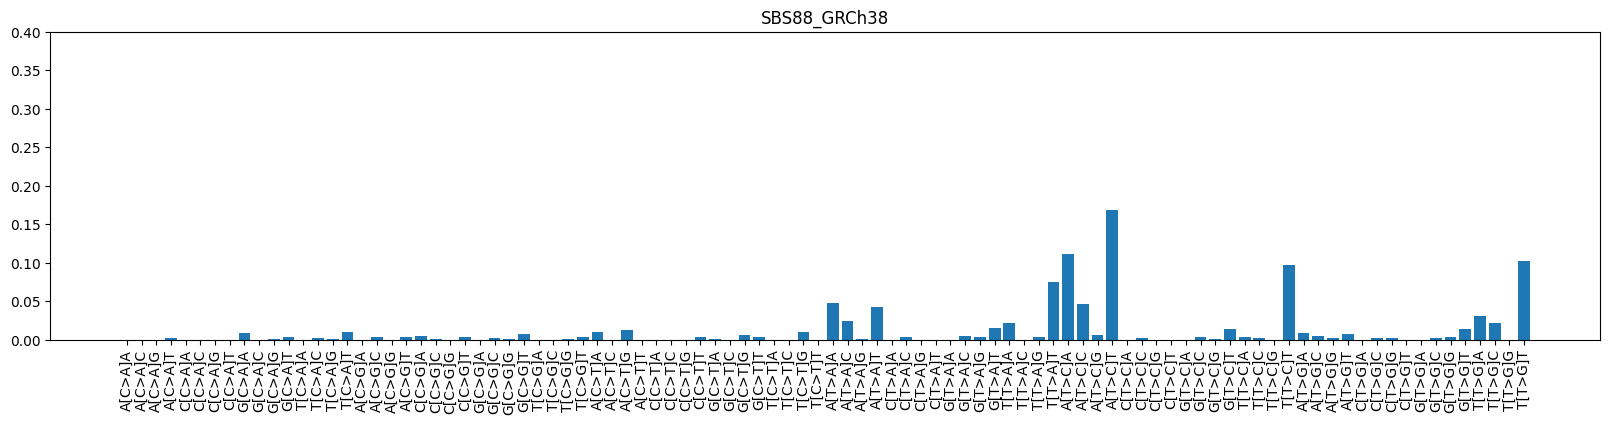

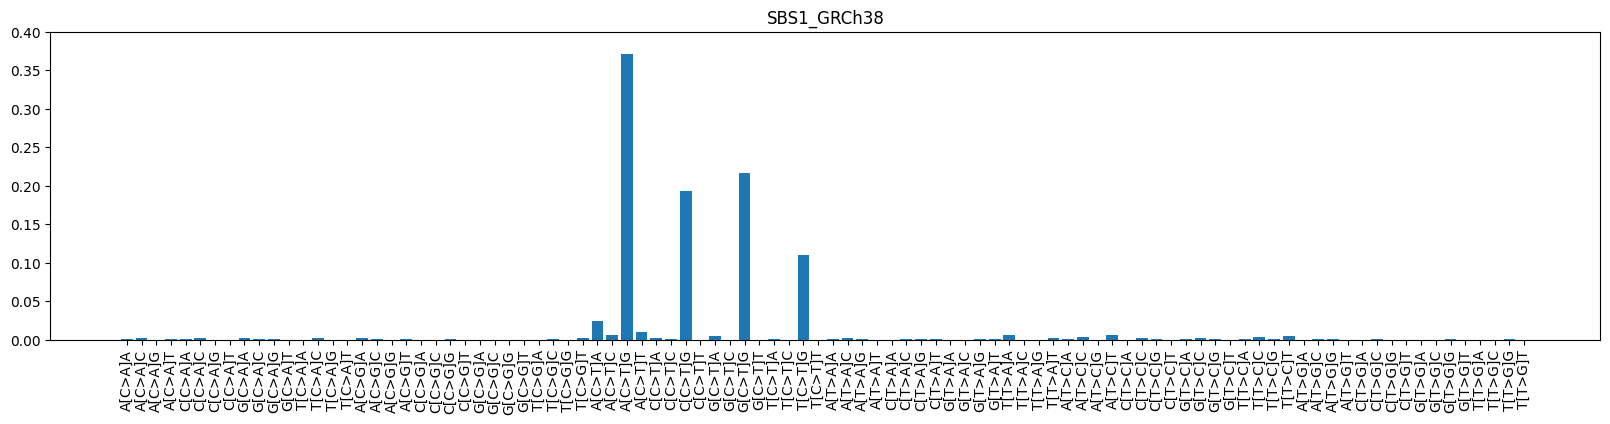

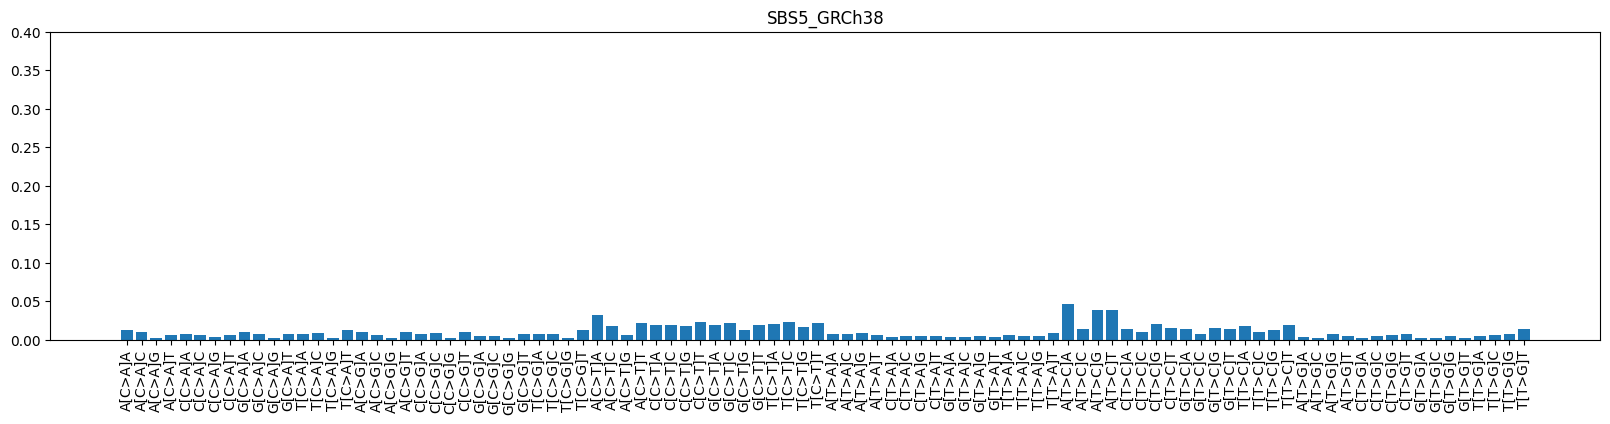

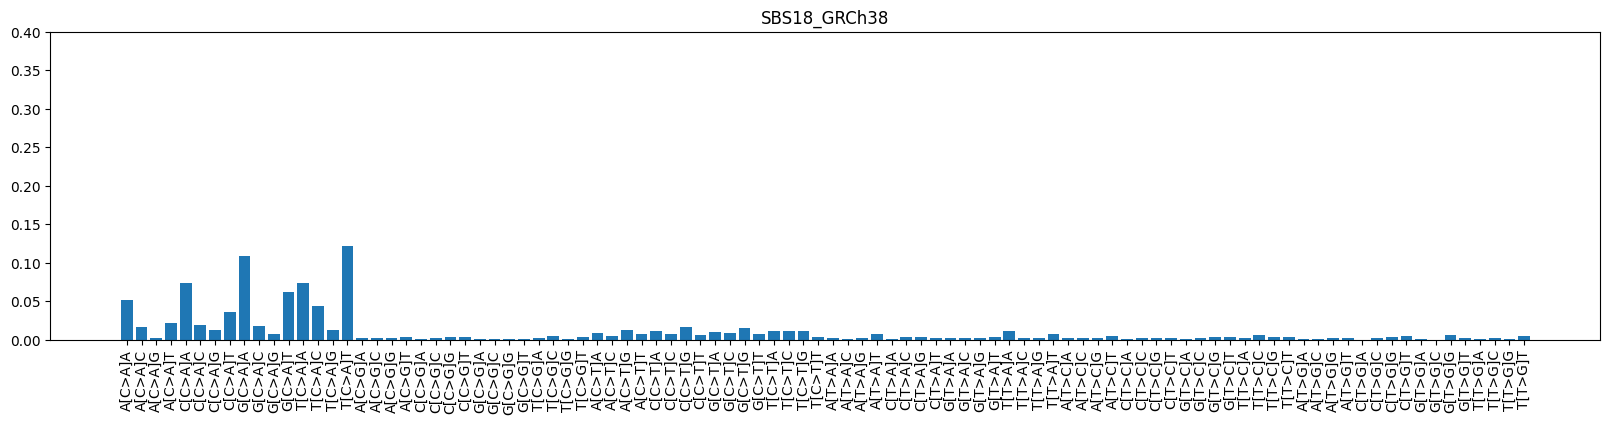

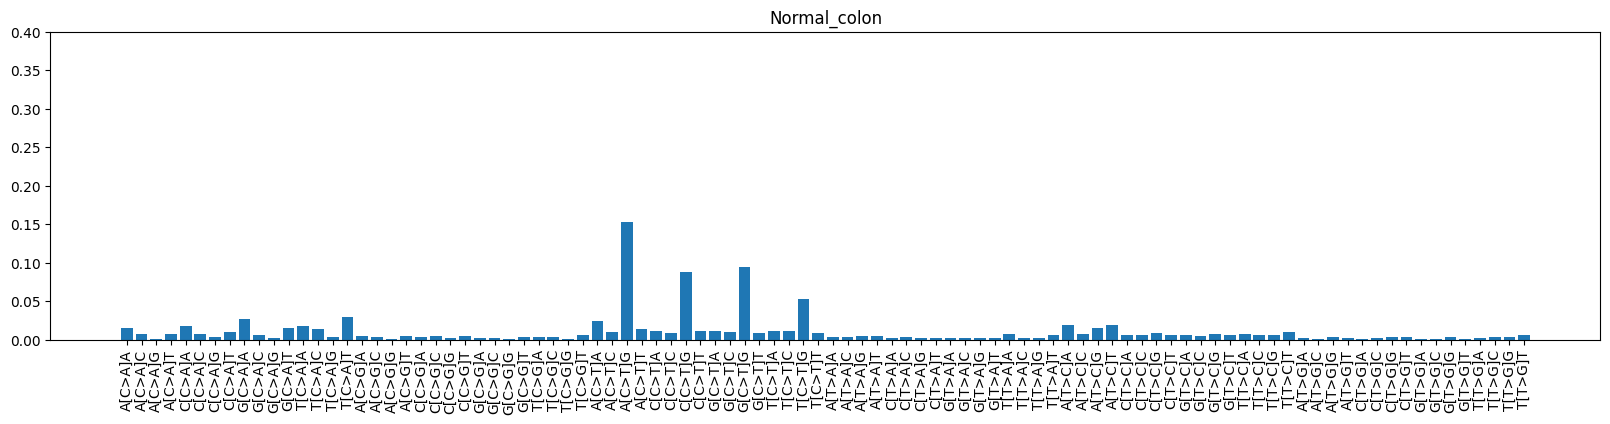

In [6]:
for col in final_df.columns[1:]:
    fig = plt.figure(figsize=(20, 4))
    ax = fig.add_subplot()
    ax.bar(final_df["Context"], final_df[col])
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(top=0.4)

    plt.title(col)
    plt.show()

In [24]:
def vis_data(data, x_axis, labels=["Test"], title="Test", alpha=1):
    fig = plt.figure(figsize=(20, 4))
    ax = fig.add_subplot()
    for i in range(len(data)):
        ax.bar(x_axis, data[i], label=labels[i], alpha=alpha)
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(top=0.4)

    plt.legend()
    plt.title(title)
    plt.show()

## 📊 Distribution Generators 

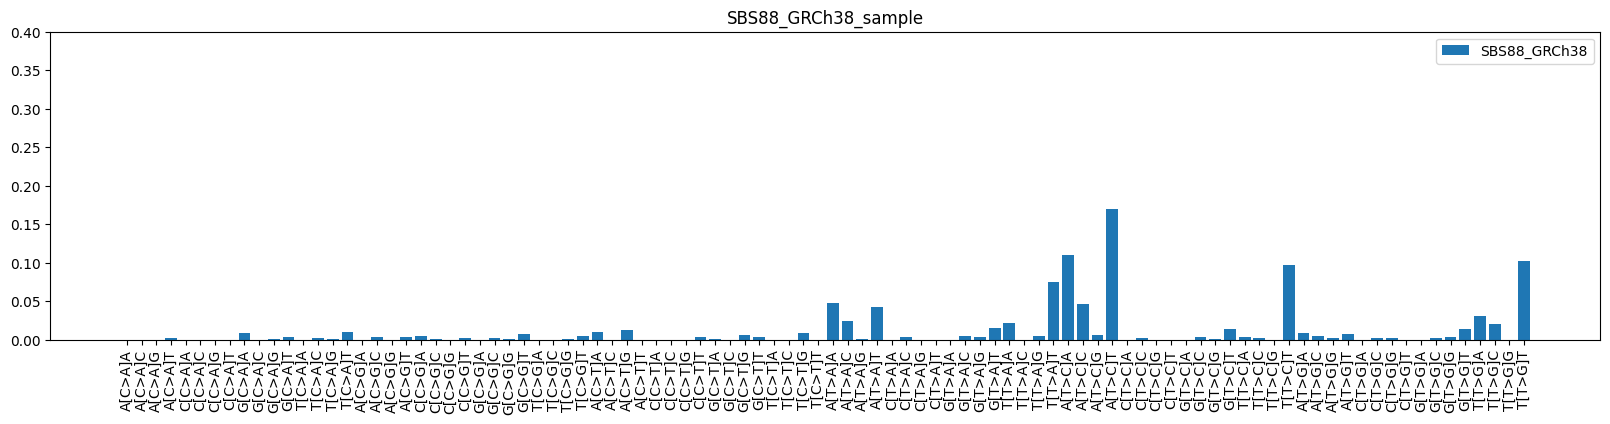

In [28]:
# We want a function that simulates the mutational signature of a weighted
# combination of SBS88_GRCh38 and the Normal-colon
# something like a*SBS88 + (1 - a)*Normal-colon

# test
samples = random.choices(range(96), final_df["SBS88_GRCh38"], k=10**6)
counts_scaled = np.bincount(samples, minlength=96)/len(samples)

vis_data([counts_scaled], final_df["Context"], ["SBS88_GRCh38"], "SBS88_GRCh38_sample")

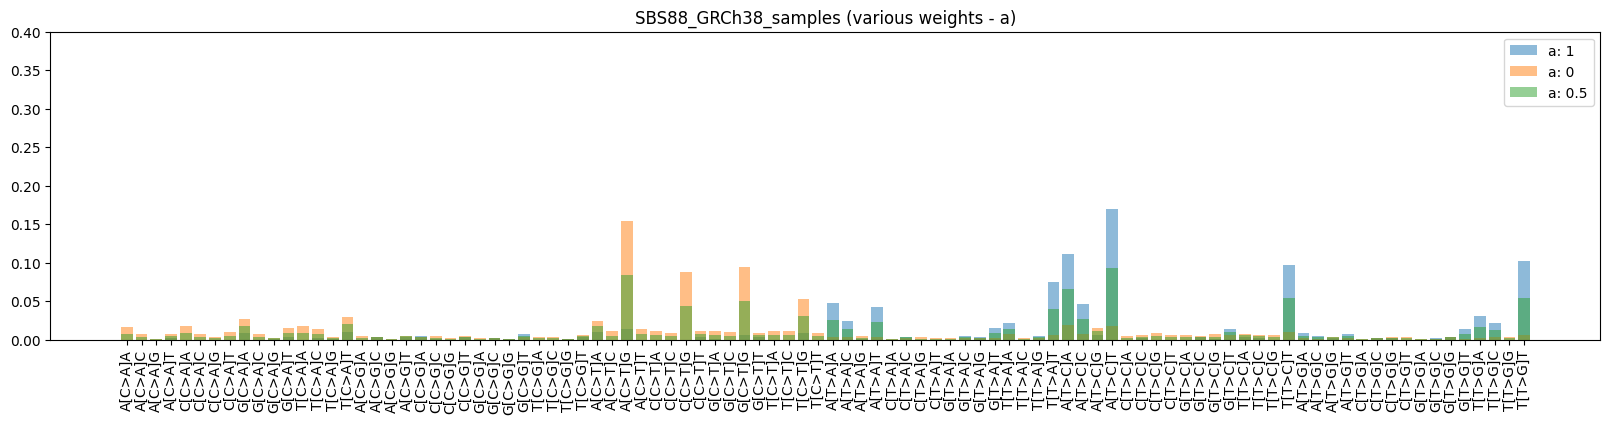

In [29]:
# parametrized function
def sample_mutational_signature(df, distrib, a=1, k=10**6):
    '''
    Args:
        df: Dataframe with the data 
        distrib: Target distribution to sample from (apart from the Normal-colon distribution)
        a: Weight of the target distribution (1-a will be the weight of the Normal-colon distribution)
        k: Number of samples
    '''
    final_distrib = a*final_df[distrib] + (1-a)*final_df["Normal_colon"]
    samples = random.choices(range(96), final_distrib, k=k)
    counts_scaled = np.bincount(samples, minlength=96)/len(samples)
    return counts_scaled

# test
a_1, a_2, a_3 = 1, 0, 0.5
test_1 = sample_mutational_signature(final_df, "SBS88_GRCh38", a_1)
test_2 = sample_mutational_signature(final_df, "SBS88_GRCh38", a_2)
test_3 = sample_mutational_signature(final_df, "SBS88_GRCh38", a_3)
vis_data([test_1, test_2, test_3], final_df["Context"], [f"a: {a_1}", f"a: {a_2}", f"a: {a_3}"],
          f"SBS88_GRCh38_samples (various weights - a)", 0.5)